# Import Libraries and Read .csv File Into Arrays

In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt

# Define some constants
G  = 6.67259 * 10**(-11)
Ms = 1.989 * 10**30     #sun mass
Re = 6371 * 10**3       #earth radius

wdid = []
logg = []
mass = []
count = 0

# Read  CSV file and save ids, masses, and log(g)s into arrays
with open('white_dwarf_data.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        count = count + 1
        if count==1: continue
        wdid.append(row[0])
        logg.append(float(row[1]))
        mass.append(float(row[2]))

# Calculations for Plotting

Since masses are in Solar Masses, there is no need to modify it for out purposes. However, we require R, so we need to extract this from surface gravities.

\begin{equation}
F= m_{object}g = \frac{Gm_{planet}m_{object}}{r^2}\rightarrow g=\frac{Gm_{planet}}{r^2}\rightarrow r=\sqrt{\frac{Gm_{planet}}{g}}
\end{equation}

First, we have to free surface gravities from log base-10.

In [2]:
logg = np.array(logg)
mass = np.array(mass)
gnorm = 10**logg

Then, we need to convert solar masses to SI units. Denoting $m_{planet}=mM_s$ Then, the formula becomes
\begin{equation}
r=\sqrt{\frac{G}{g}}\sqrt{m M_s}=\sqrt{\frac{m}{g}}\sqrt{GM_s}
\end{equation}

In [3]:
rads = np.sqrt((G*Ms)*mass/gnorm)

The last required step is to divide these to the $R_{Earth}=6371\times10^3 m$

In [4]:
rads_earthed = rads / Re

# Plotting

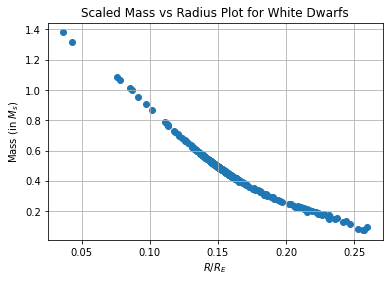

In [5]:
plt.scatter(rads_earthed, mass)
plt.xlabel("$R/R_E$")
plt.ylabel("Mass (in $M_s$)")
plt.title("Scaled Mass vs Radius Plot for White Dwarfs")
plt.grid()